In [1]:
library(tidyverse)
library(cowplot)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 10
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320
fig1_ht <- 5
fig1_wd <- 6

In [4]:
alluv_figs <- list()
for (idx in 1:3) {
    alluv_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_alluvplots.RData"))
}
alluv_figs <- Reduce(c, alluv_figs)


In [5]:
alluv_figs

[1] "CESC_alluvplot" "UCS_alluvplot"  "UCEC_alluvplot"

In [6]:
drop_x_axis <- function(plt) {
    plt +
        theme(
            axis.text.x = element_blank(),
            axis.line.x = element_blank(),
        )
}

In [7]:
mget("UCS_alluvplot") %>% drop_x_axis()

NULL

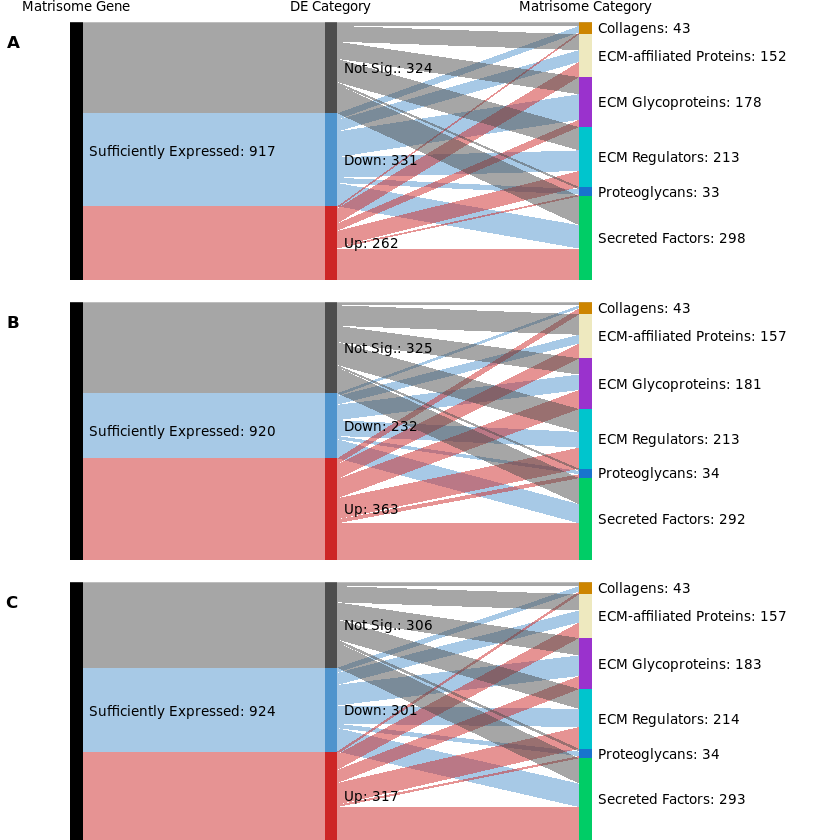

In [8]:
alluvplot_list <- c(
    mget("CESC_alluvplot"),
    mget("UCS_alluvplot") %>% purrr::map(function(p) { drop_x_axis(p) }),
    mget("UCEC_alluvplot") %>% purrr::map(function(p) { drop_x_axis(p) })
)

alluvplot_grid <- plot_grid(
    plotlist = alluvplot_list,
    nrow = 3,
    labels = c("A", "B", "C"),
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold",
    align = "vh",
    vjust = 4
)
alluvplot_grid

In [9]:
fig2 <- alluvplot_grid

In [10]:
ggsave(fig2, filename = paste0(dirs$figures_dir, "/paneled/figure2.png"), dpi = dpi, height = 6, width = 6)